# 서포트 벡터 머신 (Support Vector Machines)

- 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
- 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
- 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
- **각 서포트 벡터 사이의 마진이 큰 방향으로 학습**
- 서포트 벡터까지의 거리와 서포트 벡터의 중요도를 기반으로 예측을 수행

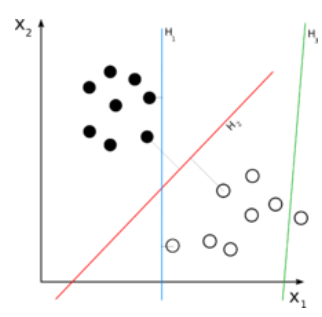

    - H3는 두 클래스의 점들을 제대로 분류하고 있지 않음
    - H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [1]:
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
import multiprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.svm import SVR,SVC
from sklearn.datasets import load_boston, load_diabetes, load_breast_cancer, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVR

In [6]:
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

model = SVR()
model.fit(X_train, y_train)

print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.21772837063748762
평가 데이터 점수 : 0.13544178468518187


### SVC

In [7]:
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

model = SVC()
model.fit(X_train, y_train)

print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.9014084507042254
평가 데이터 점수 : 0.9230769230769231


## 커널 기법
- 입력 데이터를 고차원 공간에 매핑(mapping)해서 비선형 특징을 학습할 수 있도록 확장하는 방법
- scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

In [9]:
X, y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print('Linear SVR 학습 데이터 점수 : {}'.format(linear_svr.score(X_train,y_train)))
print('Linear SVR 평가 데이터 점수 : {}'.format(linear_svr.score(X_test,y_test)))

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)

print('Polynomial SVR 학습 데이터 점수 : {}'.format(polynomial_svr.score(X_train,y_train)))
print('Polynomial SVR 평가 데이터 점수 : {}'.format(polynomial_svr.score(X_test,y_test)))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print('RBF SVR 학습 데이터 점수 : {}'.format(rbf_svr.score(X_train,y_train)))
print('RBF SVR 평가 데이터 점수 : {}'.format(rbf_svr.score(X_test,y_test)))


Linear SVR 학습 데이터 점수 : 0.7155065522216004
Linear SVR 평가 데이터 점수 : 0.6380396318362328
Polynomial SVR 학습 데이터 점수 : 0.20244542614462924
Polynomial SVR 평가 데이터 점수 : 0.13366845036746156
RBF SVR 학습 데이터 점수 : 0.21772837063748762
RBF SVR 평가 데이터 점수 : 0.13544178468518187


In [10]:
X, y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print('Linear SVC 학습 데이터 점수 : {}'.format(linear_svc.score(X_train,y_train)))
print('Linear SVC 평가 데이터 점수 : {}'.format(linear_svc.score(X_test,y_test)))

polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train, y_train)

print('Polynomial SVC 학습 데이터 점수 : {}'.format(polynomial_svc.score(X_train,y_train)))
print('Polynomial SVC 평가 데이터 점수 : {}'.format(polynomial_svc.score(X_test,y_test)))

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

print('RBF SVC 학습 데이터 점수 : {}'.format(rbf_svc.score(X_train,y_train)))
print('RBF SVC 평가 데이터 점수 : {}'.format(rbf_svc.score(X_test,y_test)))


Linear SVC 학습 데이터 점수 : 0.960093896713615
Linear SVC 평가 데이터 점수 : 0.986013986013986
Polynomial SVC 학습 데이터 점수 : 0.9014084507042254
Polynomial SVC 평가 데이터 점수 : 0.9230769230769231
RBF SVC 학습 데이터 점수 : 0.9014084507042254
RBF SVC 평가 데이터 점수 : 0.9230769230769231


### 매개변수 튜닝
- SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
- 매개변수를 변경하면서 성능변화를 관찰

In [13]:
X, y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

polynomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

print('kernel=poly, degree={}, C={}, gamma={}'.format(2,0.1,'auto'))
print('Polynomial SVC 학습 데이터 점수 : {}'.format(polynomial_svc.score(X_train,y_train)))
print('Polynomial SVC 평가 데이터 점수 : {}'.format(polynomial_svc.score(X_test,y_test)))

kernel=poly, degree=2, C=0.1, gamma=auto
Polynomial SVC 학습 데이터 점수 : 0.9835680751173709
Polynomial SVC 평가 데이터 점수 : 0.993006993006993


In [15]:
rbf_svc = SVC(kernel='rbf', C=2.0, gamma = 'scale')
rbf_svc.fit(X_train, y_train)

print('kernel=poly, C={}, gamma={}'.format(2.0,'scale'))
print('RBF SVC 학습 데이터 점수 : {}'.format(rbf_svc.score(X_train,y_train)))
print('RBF SVC 평가 데이터 점수 : {}'.format(rbf_svc.score(X_test,y_test)))

kernel=poly, C=2.0, gamma=scale
RBF SVC 학습 데이터 점수 : 0.9154929577464789
RBF SVC 평가 데이터 점수 : 0.9370629370629371


### 데이터 전처리
- SVM은 입력 데이터가 정규화 되어야 좋은 성능을 ㅂ임
- 주로 모든 특성 값을 [0,1] 범위로 맞추는 방법을 사용
- scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [16]:
X, y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

In [22]:
model = SVC()
model.fit(X_train,y_train)

print('SVC 학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('SVC 평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

SVC 학습 데이터 점수 : 0.9014084507042254
SVC 평가 데이터 점수 : 0.9230769230769231


In [26]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

model = SVC()
model.fit(X_train_scale,y_train)

print('정규화 학습 데이터 점수 : {}'.format(model.score(X_train_scale,y_train)))
print('정규화 평가 데이터 점수 : {}'.format(model.score(X_test_scale,y_test)))

정규화 학습 데이터 점수 : 0.9835680751173709
정규화 평가 데이터 점수 : 0.986013986013986


In [27]:
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

model = SVC()
model.fit(X_train_scale,y_train)

print('표준화 학습 데이터 점수 : {}'.format(model.score(X_train_scale,y_train)))
print('표준화 평가 데이터 점수 : {}'.format(model.score(X_test_scale,y_test)))

표준화 학습 데이터 점수 : 0.9812206572769953
표준화 평가 데이터 점수 : 0.986013986013986


## Linear SVR

#### 보스턴 주택 가격

In [84]:
X, y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [92]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.6839199654331991
평가 데이터 점수 : 0.8000867456379769


SVM이 차원을 늘려서 매핑한 다음 나누기 때문에, 눈으로 보기위해(시각화 위해) TSNE를 통해서 저차원 변환 후  

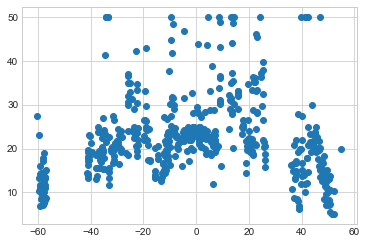

In [94]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

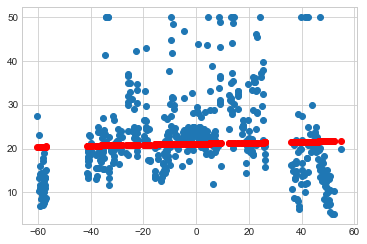

In [95]:
model.fit(X_comp, y)
predict = model.predict(X_comp)

plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [96]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00999951, 0.01300025, 0.01399994, 0.01100111, 0.01000142]),
 'score_time': array([0.00200152, 0.00199986, 0.00100017, 0.0019989 , 0.00099969]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [97]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale','auto'],
              'model__C' : [1.0,0.1,0.01],
              'model__epsilon': [1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [98]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

## Kernel SVR

In [100]:
X, y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [101]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.6936511072209748
평가 데이터 점수 : 0.6120647722286499


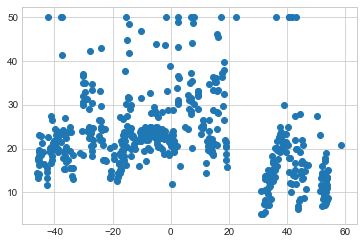

In [104]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

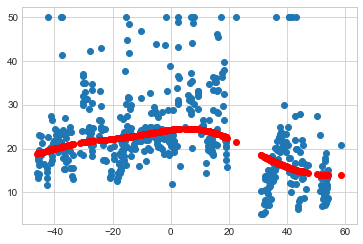

In [105]:
model.fit(X_comp, y)
predict = model.predict(X_comp)

plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [112]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01046014, 0.01046014, 0.00999975, 0.01099968, 0.01099968]),
 'score_time': array([0.0045414 , 0.0045414 , 0.00600004, 0.00600147, 0.00700068]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [113]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel' : ['rbf', 'polynomial','sigmoid']}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [114]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [115]:
model = gs.best_estimator_
model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [116]:
print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.6936511072209752
평가 데이터 점수 : 0.6120647722286499


## Linear SVC

In [118]:
X, y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [119]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [121]:
print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.9868131868131869
평가 데이터 점수 : 0.9824561403508771


In [132]:
def make_meshgrid(x,y,h=0.2):
    x_min,x_max = x.min()-1, x.max()+1
    y_min,y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                         np.arange(y_min,y_max,h))
    return xx,yy

def plt_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contour(xx,yy,Z,**params)
    
    return out

In [133]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0,X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0,X1)

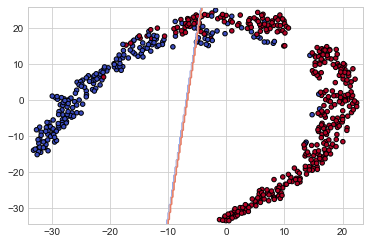

In [135]:
model.fit(X_comp, y)

plt_contours(model,xx,yy,cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k' )

In [136]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.00600028, 0.00699973, 0.00400019, 0.00499988, 0.00499988]),
 'score_time': array([0.00099945, 0.00099993, 0.00099945, 0.00100017, 0.0010004 ]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [137]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale','auto'],
              'model__C' : [1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [138]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])